<img src="./intro_freyberg_model_files/c001.png" style="float: center; width: 75%;  margin-bottom: 0.5em;">

In [ ]:
!pip install flopy

part0_02_intro_to_freyberg_model              (01)  c/ s/ dependencies

part1_02_pest_setup

part2_03_prior_monte_carlo

In [22]:
import os
import shutil
import platform
import pandas as pd
import matplotlib.pyplot as plt
import sys
# sys.path.append(os.path.join("..", "..", "dependencies"))
import flopy
import pyemu
sys.path.insert(0,"..")
import herebedragons as hbd

In [24]:
org_ws = os.path.join('..', '..', 'models', 'monthly_model_files_1lyr_newstress')
sim_ws = os.path.join('freyberg_mf6')

if os.path.exists(sim_ws):
    shutil.rmtree(sim_ws)
shutil.copytree(org_ws, sim_ws)

hbd.prep_bins(sim_ws)

In [28]:
sim = flopy.mf6.MFSimulation.load(sim_ws=sim_ws, verbosity_level=0)
gwf = sim.get_model()
pyemu.os_utils.run("mf6",cwd=sim_ws)

mf6.exe


In [ ]:
# _________________________________________________no_____________________ flopy = gwf
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=0)
mm.plot_grid()
mm.plot_inactive()
mm.plot_bc('ghb')
mm.plot_bc('sfr')
mm.plot_bc('wel');

In [32]:
for lay in range(gwf.dis.nlay.array):
    print(f'K in layer {lay+1}:', "{:10.1f}".format(gwf.npf.k.get_data(lay).mean()))

K in layer 1:       11.1


In [ ]:
# _________________________________________________no____
gwf.npf.k.plot(colorbar=True, mflay=0);
gwf.dis.top.plot(colorbar=True, masked_values=[-1049.99])
gwf.dis.botm.plot(colorbar=True);
# _________________________________________________no____
obs_data = pd.read_csv(os.path.join('..','..','models','daily_freyberg_mf6_truth','obs_data.csv'))
obs_data = obs_data.pivot(index='time', columns='site', values='value')
obs_data.head()
# _________________________________________________no____

E:\00_Betami\10_Beta_tutorials_GMDSI\Tutorials\02a_Beta_part0_02_intro_to_freyberg_model\02_RMG_Freyberg.xlsx

In [ ]:
# _________________________________________________no____
obs_data = pd.read_csv(os.path.join('..','..','models','daily_freyberg_mf6_truth','obs_data.csv'))
obs_data.head()

In [ ]:
# _________________________________________________no____
for i in gwf.obs:
    print(i.output.obs_names)
sfr_obs = pd.read_csv(os.path.join(sim_ws, 'sfr.csv'))
sfr_obs.head()

First define ... then plot

In [ ]:
obs_data = pd.read_csv(os.path.join('..','..','models','daily_freyberg_mf6_truth','obs_data.csv'))
obs_data = obs_data.pivot(index='time', columns='site', values='value')                             #___important___Pivot
site = 'GAGE-1'
fig,ax=plt.subplots(1,1)  #_______________________________then plot
obs_data.plot(y=site, ax=ax, label='measured')
sfr_obs.plot(x='time', y=site, ax=ax, label='modelled')
ax.set_title(site);

In [ ]:
# _________________________________________________no____
obs_data = pd.read_csv(os.path.join('..','..','models','daily_freyberg_mf6_truth','obs_data.csv'))
obs_data = obs_data.pivot(index='time', columns='site', values='value')                             #___important___Pivot
obs_data.head()

In [ ]:
# _________________________________________________no____
hds_obs = pd.read_csv(os.path.join(sim_ws, 'heads.csv'))
hds_obs.head()

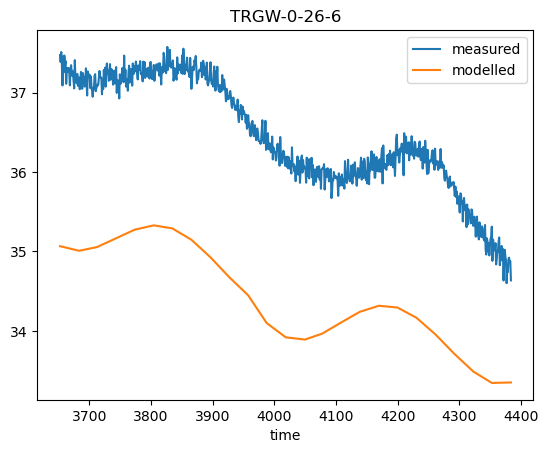

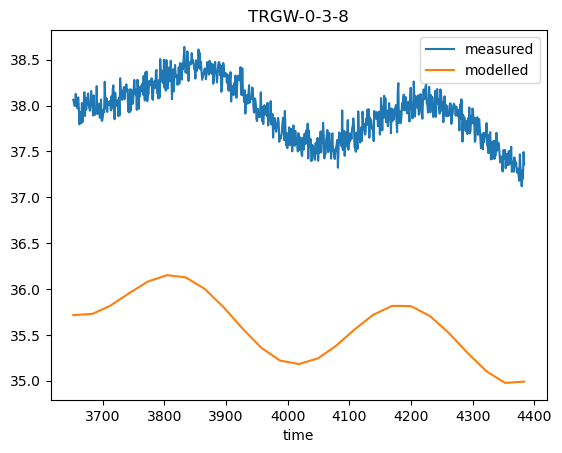

In [63]:
# _________________________________________________no____             Pto 1    &     Pto 2   _____ Flopy  ____ site ___hds
for site in ['TRGW-0-26-6','TRGW-0-3-8']:
    fig,ax=plt.subplots(1,1)
    obs_data.plot(y=site, ax=ax, label='measured')
    hds_obs.plot(x='time', y=site, ax=ax, label='modelled')

    ax.set_title(site);

In [ ]:
hdobj = gwf.output.head()
times = hdobj.get_times()
hdobj.plot(mflay=0, colorbar=True, totim=times[-1], masked_values=[1e30]);